In [ ]:
# Train- test according to files -interaction matrix for both - hpstack save files then train.(np files)
# ----------------------------------
# Add behaviours dataset- after implementing the model
# ----------------------------------
# Predict time spend on article
# In view article-predict time spend (function user id,article id-> Vectors userarray,articles array-remove 0-hstack) 
# ----------------------------------

### Import libraries

In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

from tqdm.keras import TqdmCallback
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

import datetime

In [ ]:
#### 

In [41]:
import os
os.getcwd()

'C:\\Users\\giwrg\\Υπολογιστής\\Recommendation_System_RecSys_Challenge_2024'

In [27]:
# Read interaction matrix pickle file
size = 'demo'
fillna_value = '0'
interaction_matrix_file_path = f'./files/pickle/interaction_matrix_{size}_{fillna_value}.pkl'
interaction_matrix_df = pd.read_pickle(interaction_matrix_file_path)
print('Interaction matrix df shape:                      ',interaction_matrix_df.shape)

user_matrix_df_file_path = f'./files/pickle/user_matrix_{size}_{fillna_value}.pkl'
article_matrix_df_file_path = f'./files/pickle/article_matrix_{size}_{fillna_value}.pkl'

user_matrix_df = pd.read_pickle(user_matrix_df_file_path)
article_matrix_df = pd.read_pickle(article_matrix_df_file_path)
print('User embedding df shape:                         ',user_matrix_df.shape)
print('Article embedding df shape:                      ',article_matrix_df.shape)

Interaction matrix df shape:                       (1590, 4247)
User embedding df shape:                          (1590, 300)
Article embedding df shape:                       (4247, 300)


In [28]:
# Convert the dataframes to numpy arrays
user_vectors = user_matrix_df.values
article_vectors = article_matrix_df.values
interaction_matrix = interaction_matrix_df.values

In [40]:
user_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
user_id,,,,,,,,,,,,,,,,,,,,,
11313,-2.825051,-0.367806,0.030133,-2.053737,3.554389,1.388510,-2.562073,-1.092667,-2.818263,2.857499,...,1.205560,0.040370,-0.489170,-0.565870,0.375311,0.611979,0.917979,-1.692447,-0.107961,0.027109
13538,0.179039,-0.434059,0.162799,-0.843279,-0.408800,-0.539446,-0.002827,-0.149006,-0.203626,-0.120278,...,0.086555,-0.021488,-0.484404,0.346705,0.084665,0.250012,0.218374,-1.116250,-0.028726,0.015211
15430,-0.106730,0.005686,-0.084841,-0.009383,0.226627,0.027665,0.040393,-0.214349,0.025770,-0.020836,...,-0.002111,0.002745,-0.053999,0.034044,0.005430,0.013288,0.006048,-0.053708,-0.000820,0.003777
19181,0.532511,0.428790,0.056709,1.775466,-2.258640,1.055624,2.263162,-1.576362,1.018655,-0.314405,...,0.274910,0.112743,-2.257519,0.945872,0.334943,0.180891,1.503973,-2.853840,-0.032769,0.035477
19568,-0.000986,-0.207481,-0.285881,-0.338593,0.063095,0.167911,0.069495,0.606133,-0.365199,0.463814,...,0.274826,0.057568,0.610297,0.093405,0.089016,0.157710,0.187763,-0.463365,-0.003808,0.001931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581162,0.695479,-0.519523,-1.675876,0.386194,0.731115,-0.167112,1.774010,-2.137779,-0.047850,-2.243982,...,0.067668,-0.045059,-0.655019,0.251897,0.177066,0.403311,0.579807,-1.749934,-0.037405,0.018092
2583035,-0.074542,-0.367393,-0.254414,-0.088645,0.383429,0.046153,0.748360,-0.477628,-0.014292,1.273346,...,0.393398,0.042920,-0.695452,-0.052766,0.018055,-0.941968,0.780453,-1.590283,-0.044368,0.024029
2583477,-1.435018,-1.634622,-1.577227,-4.172942,-0.279585,1.647765,-1.424228,0.707971,2.286822,2.882404,...,0.768613,0.454604,-0.254245,-2.752483,0.800912,0.409095,2.954754,-5.492107,-0.064454,0.020887


In [29]:
# Normalize the embeddings (optional, depending on your use case)
# scaler = StandardScaler()
# user_vectors = scaler.fit_transform(user_vectors)
# article_vectors = scaler.transform(article_vectors)

In [30]:
# Normalize the original interaction matrix
interaction_matrix_normalized = MinMaxScaler().fit_transform(interaction_matrix)

In [31]:
# Get the indices of the non-zero entries in the interaction matrix
user_idx, article_idx = np.where(interaction_matrix_normalized != 0)
read_times = interaction_matrix_normalized[user_idx, article_idx]

In [32]:
# Create the input features by concatenating user and article vectors
X = np.hstack((user_vectors[user_idx], article_vectors[article_idx]))
y = read_times

In [33]:
# Use only the first 100 rows for testing
X = X[:5000]
y = y[:5000]

In [34]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 600)
(1000, 600)
(4000,)
(1000,)


In [35]:
# Define the model
model = Sequential([
    tf.keras.Input(shape=(600,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation = 'linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])


In [36]:
# Prepare TensorBoard callback
log_dir = "files/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
num_epochs = 20
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=16,
                    validation_data=(X_test, y_test),
                    callbacks=[tensorboard_callback, TqdmCallback(verbose=1)],
                    verbose=2)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/20
250/250 - 2s - loss: 0.1866 - mse: 0.1866 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 2/20
250/250 - 1s - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 3/20
250/250 - 1s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 4/20
250/250 - 1s - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 5/20
250/250 - 1s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 6/20
250/250 - 1s - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 7/20
250/250 - 1s - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 8/20
250/250 - 1s - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 9/20
250/250 - 1s - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 10/20
250/250 - 1s - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 11/20
250/250 - 1s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 12

In [37]:
# Evaluate the model
train_loss, train_mse = model.evaluate(X_train, y_train, verbose=1)
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=1)

32/32 [==============================] - 0s 2ms/step - loss: 0.0147 - mse: 0.0147


In [38]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
#   plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

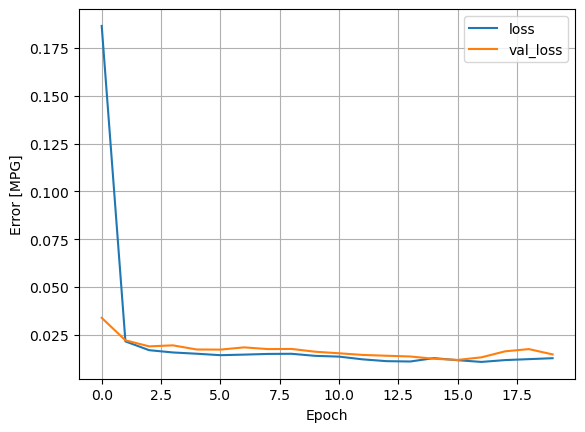

In [39]:
plot_loss(history)